In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
df = pd.read_excel('data-america.xlsx', sheet_name='Sheet1', names=["Year", "thu_nhap", "tieu_dung"]).drop(['Year'], axis=1)
df

,thu_nhap,tieu_dung
0,751.6,672.1
1,779.2,696.8
2,810.3,737.1
3,864.7,767.9
4,857.5,762.8
5,874.9,779.4
6,906.8,823.1
7,942.9,864.3
8,988.8,903.2
9,1015.7,927.6


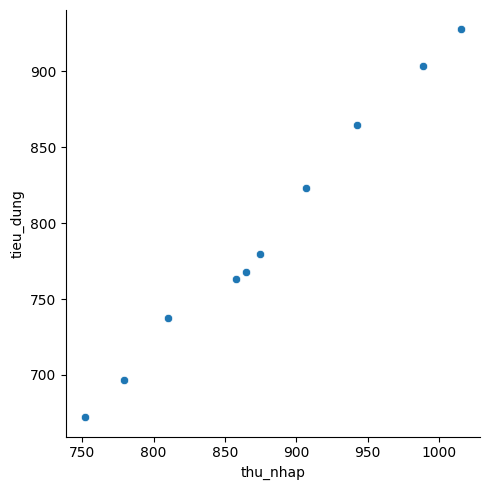

In [32]:
sns.relplot(x="thu_nhap", y="tieu_dung", data=df);

In [33]:
# linear model
def h(w0, w1, x):
    y = w0 + w1*x
    return y

In [34]:
w0 = 0
w1 = 0.5
df["tieu_dung_pred"] = df["thu_nhap"].map(lambda x: h(w0, w1, x))
df["e"] = df["tieu_dung_pred"] - df["tieu_dung"]
df["e^2"] = df["e"] ** 2
print(f"Mean square error loss: {df['e^2'].mean()}")
df

Mean square error loss: 126778.60550000002


,thu_nhap,tieu_dung,tieu_dung_pred,e,e^2
0,751.6,672.1,375.80,-296.30,87793.6900
1,779.2,696.8,389.60,-307.20,94371.8400
2,810.3,737.1,405.15,-331.95,110190.8025
3,864.7,767.9,432.35,-335.55,112593.8025
4,857.5,762.8,428.75,-334.05,111589.4025
5,874.9,779.4,437.45,-341.95,116929.8025
6,906.8,823.1,453.40,-369.70,136678.0900
7,942.9,864.3,471.45,-392.85,154331.1225
8,988.8,903.2,494.40,-408.80,167117.4400
9,1015.7,927.6,507.85,-419.75,176190.0625


In [35]:
w1 = (np.mean(df['thu_nhap']*df["tieu_dung"]) - np.mean(df["thu_nhap"]) * np.mean(df["tieu_dung"])) / (np.mean(df["thu_nhap"]**2) - np.mean(df["thu_nhap"])**2)
w0 = np.mean(df["tieu_dung"] - w1*np.mean(df["thu_nhap"]))
df["tieu_dung_pred"] = df["thu_nhap"].map(lambda x: h(w0, w1, x))
df["e"] = df["tieu_dung_pred"] - df["tieu_dung"]
df["e^2"] = df["e"] ** 2
print(f"Mean square error loss: {df['e^2'].mean()}")
df

Mean square error loss: 53.70056284227458


,thu_nhap,tieu_dung,tieu_dung_pred,e,e^2
0,751.6,672.1,668.436370,-3.663630,13.422187
1,779.2,696.8,695.464137,-1.335863,1.784530
2,810.3,737.1,725.919338,-11.180662,125.007198
3,864.7,767.9,779.191459,11.291459,127.497044
4,857.5,762.8,772.140737,9.340737,87.249369
5,874.9,779.4,789.179982,9.779982,95.648039
6,906.8,823.1,820.418596,-2.681404,7.189925
7,942.9,864.3,855.770132,-8.529868,72.758641
8,988.8,903.2,900.718484,-2.481516,6.157920
9,1015.7,927.6,927.060765,-0.539235,0.290775


In [36]:
print(w0, w1)

-67.5806508868505 0.9792669247154935


In [37]:
h(w0, w1, 1000)

911.6862738286429

In [38]:
w1 = (np.mean(df['thu_nhap']*df["tieu_dung"]) - np.mean(df["thu_nhap"]) * np.mean(df["tieu_dung"])) / (np.mean(df["thu_nhap"]**2) - np.mean(df["thu_nhap"])**2)
w0 = np.mean(df["tieu_dung"] - w1*np.mean(df["thu_nhap"]))
df["tieu_dung_pred"] = df["thu_nhap"].map(lambda x: h(w0, w1, x))
df["e"] = df["tieu_dung_pred"] - df["tieu_dung"]
df["e^2"] = df["e"] ** 2
print(f"Mean square error loss: {df['e^2'].mean()}")
df

Mean square error loss: 53.70056284227458


,thu_nhap,tieu_dung,tieu_dung_pred,e,e^2
0,751.6,672.1,668.436370,-3.663630,13.422187
1,779.2,696.8,695.464137,-1.335863,1.784530
2,810.3,737.1,725.919338,-11.180662,125.007198
3,864.7,767.9,779.191459,11.291459,127.497044
4,857.5,762.8,772.140737,9.340737,87.249369
5,874.9,779.4,789.179982,9.779982,95.648039
6,906.8,823.1,820.418596,-2.681404,7.189925
7,942.9,864.3,855.770132,-8.529868,72.758641
8,988.8,903.2,900.718484,-2.481516,6.157920
9,1015.7,927.6,927.060765,-0.539235,0.290775


In [39]:
w0_means = []
w1_means = []

for i in range(100):
    samples = df.sample(n=10, replace=True)
    w1_sample = (np.mean(samples['thu_nhap']*samples["tieu_dung"]) - np.mean(samples["thu_nhap"]) * np.mean(samples["tieu_dung"])) / (np.mean(samples["thu_nhap"]**2) - np.mean(samples["thu_nhap"])**2)
    w0_sample = np.mean(samples["tieu_dung"] - w1*np.mean(samples["thu_nhap"]))
    w0_means.append(w0_sample)
    w1_means.append(w1_sample)

w0_means = np.array(w0_means)
x_min_w0 = np.percentile(w0_means, 2.5)
x_max_w0 = np.percentile(w0_means, 97.5)

w1_means = np.array(w1_means)
x_min_w1 = np.percentile(w1_means, 2.5)
x_max_w1 = np.percentile(w1_means, 97.5)

print(x_min_w0, x_max_w0)
print(x_min_w1, x_max_w1)

-72.60881787277651 -63.62083172344926
0.912370993063932 1.0538208662515673


In [40]:
x = 1000
# The worst
w0 = np.min(w0_means)
w1 = np.min(w1_means)
print("Xau nhat: ", h(w0, w1, x))

# Average
w0 = np.mean(w0_means)
w1 = np.mean(w1_means)
print("Trung binh: ", h(w0, w1, x))

# The best
w0 = np.max(w0_means)
w1 = np.max(w1_means)
print("Tot nhat: ", h(w0, w1, x))

Xau nhat:  663.596168732685
Trung binh:  911.6859456516754
Tot nhat:  1029.648628655813


In [41]:
def likelihood(sigma, e):
    norm = stats.norm(loc=0, scale=sigma)
    return norm.pdf(e)

In [42]:
sigma = 1
df['likelihood'] = df['e'].map(lambda x: likelihood(sigma, x))
display(df)

,thu_nhap,tieu_dung,tieu_dung_pred,e,e^2,likelihood
0,751.6,672.1,668.436370,-3.663630,13.422187,4.856454e-04
1,779.2,696.8,695.464137,-1.335863,1.784530,1.634573e-01
2,810.3,737.1,725.919338,-11.180662,125.007198,2.857208e-28
3,864.7,767.9,779.191459,11.291459,127.497044,8.227704e-29
4,857.5,762.8,772.140737,9.340737,87.249369,4.518043e-20
5,874.9,779.4,789.179982,9.779982,95.648039,6.779572e-22
6,906.8,823.1,820.418596,-2.681404,7.189925,1.095564e-02
7,942.9,864.3,855.770132,-8.529868,72.758641,6.332453e-17
8,988.8,903.2,900.718484,-2.481516,6.157920,1.835417e-02
9,1015.7,927.6,927.060765,-0.539235,0.290775,3.449603e-01


In [43]:
results = smf.ols('tieu_dung ~ thu_nhap', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              tieu_dung   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     959.9
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.28e-09
Time:                        21:49:47   Log-Likelihood:                -34.107
No. Observations:                  10   AIC:                             72.21
Df Residuals:                       8   BIC:                             72.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.5807     27.911     -2.421      0.0

c:\Users\NNguye05\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
